# Week4 事前課題２
## 住宅価格の予想
### 【問題1】練習のために特徴量の選択
---

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 100)

#データフレームにデータを格納
df_0 = pd.read_csv('train.csv', index_col=0)
df = df_0.loc[:,["SalePrice", "GrLivArea", "YearBuilt"]]
df_0.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 【問題2】線形回帰による推定と評価
---

In [2]:
df.describe()

,SalePrice,GrLivArea,YearBuilt
count,1460.000000,1460.000000,1460.000000
mean,180921.195890,1515.463699,1971.267808
std,79442.502883,525.480383,30.202904
min,34900.000000,334.000000,1872.000000
25%,129975.000000,1129.500000,1954.000000
50%,163000.000000,1464.000000,1973.000000
75%,214000.000000,1776.750000,2000.000000
max,755000.000000,5642.000000,2010.000000


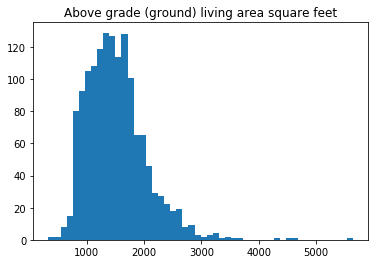

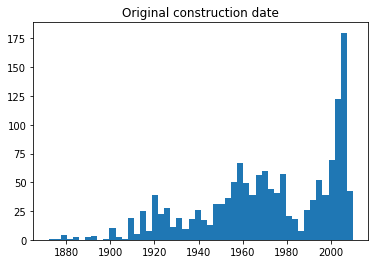

In [3]:
#ヒストグラム
plt.title("Above grade (ground) living area square feet")
plt.hist(df.GrLivArea, bins=50)
plt.show()

plt.title("Original construction date")
plt.hist(df.YearBuilt, bins=50)
plt.show()

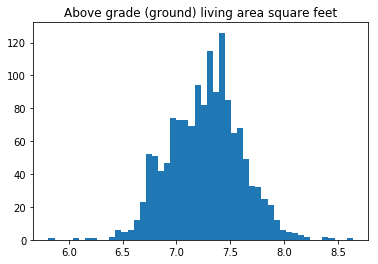

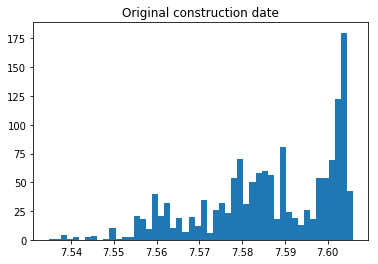

In [4]:
#対数変換後
plt.title("Above grade (ground) living area square feet")
plt.hist(np.log(df.GrLivArea.values), bins=50)
plt.show()

plt.title("Original construction date")
plt.hist(np.log(df.YearBuilt.values), bins=50)
plt.show()

In [20]:
#相関行列
df.corr()

,SalePrice,GrLivArea,YearBuilt
SalePrice,1.000000,0.708624,0.522897
GrLivArea,0.708624,1.000000,0.199010
YearBuilt,0.522897,0.199010,1.000000


[]

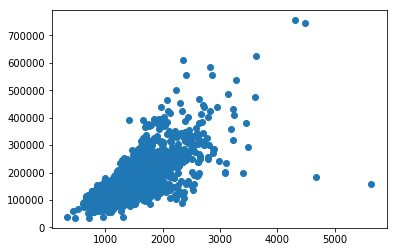

In [21]:
#散布図
plt.scatter(df.GrLivArea, df.SalePrice,)
plt.plot()


[]

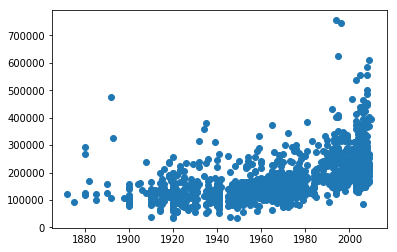

In [22]:
plt.scatter(df.YearBuilt, df.SalePrice)
plt.plot()

#### 【データの外観】
- 欠損値は無し
- ターゲットとの相関は２特徴量共にある程度ある
- 特徴量同士の相関は低い

#### 前処理・標準化


In [5]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,[1,2]].values
y = df["SalePrice"].values

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.25, random_state=0,) #シードも設定しておく

print("X_train", np.shape(X_train))
print("X_test", np.shape(X_test))
print("Y_train", np.shape(y_train))
print("Y_test", np.shape(y_test))

X_train (1095, 2)
X_test (365, 2)
Y_train (1095,)
Y_test (365,)


In [7]:
#from sklearn.preprocessing import StandardScaler

#X_trainのパラメータを計算
#sc = StandardScaler()
#sc.fit(X_train)
#print("相対的なスケーリング", sc.scale_)
#print("平均値", sc.mean_)
#print("分散値", sc.var_)
#print("サンプル数", sc.n_samples_seen_)

In [6]:
#対数変換のみやる
X_train_sc = np.log(X_train)
X_test_sc = np.log(X_test)

### 【問題２】線形回帰による推定と評価
---


In [9]:
#線形回帰による推定

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train_sc, y_train)

print('coefficient = ', reg.coef_[0]) # 説明変数の係数を出力
print('intercept = ', reg.intercept_) # 切片を出力

coefficient =  145162.87560905804
intercept =  -15688277.086604863


In [10]:
#平均二乗誤差による評価

from sklearn.metrics import mean_squared_error

y_train_pred = reg.predict(X_train_sc) # 学習データに対する目的変数を予測
y_pred = reg.predict(X_test_sc)   # 検証データに対する目的変数を予測

print('MSE train data: ', mean_squared_error(y_train, y_train_pred)) # 学習データを用いたときの平均二乗誤差を出力
print('MSE test data : ', mean_squared_error(y_test, y_pred))         # 検証データを用いたときの平均二乗誤差を出力

reg_list = [mean_squared_error(y_train, y_train_pred), 
           mean_squared_error(y_test, y_pred),
           mean_squared_error(y_train, y_train_pred) / mean_squared_error(y_test, y_pred)]

MSE train data:  2299965422.2012014
MSE test data :  2707945724.1496553


学習データ、検証データそれぞれを用いたときの平均二乗誤差を比較すると、検証データを用いたときの誤差の方が大きいことがわかる。このことから、構築した線形モデルは学習データにフィットしすぎている（過学習）ことが示唆される。

### 【問題3】手法の比較
---

In [11]:
#SVR
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)

y_train_pred = svr.predict(X_train_sc) # 学習データに対する目的変数を予測
y_pred = svr.predict(X_test_sc)   # 検証データに対する目的変数を予測

print('MSE train data: ', mean_squared_error(y_train, y_train_pred)) # 学習データを用いたときの平均二乗誤差を出力
print('MSE test data : ', mean_squared_error(y_test, y_pred))         # 検証データを用いたときの平均二乗誤差を出力

svr_list = [mean_squared_error(y_train, y_train_pred), 
           mean_squared_error(y_test, y_pred),
           mean_squared_error(y_train, y_train_pred)/ mean_squared_error(y_test, y_pred)]

MSE train data:  6540718821.74812
MSE test data :  6962359707.7352085


In [12]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

y_train_pred = dtr.predict(X_train_sc) # 学習データに対する目的変数を予測
y_pred = dtr.predict(X_test_sc)   # 検証データに対する目的変数を予測

print('MSE train data: ', mean_squared_error(y_train, y_train_pred)) # 学習データを用いたときの平均二乗誤差を出力
print('MSE test data : ', mean_squared_error(y_test, y_pred))         # 検証データを用いたときの平均二乗誤差を出力

dtr_list = [mean_squared_error(y_train, y_train_pred), 
           mean_squared_error(y_test, y_pred),
           mean_squared_error(y_train, y_train_pred) / mean_squared_error(y_test, y_pred)]

MSE train data:  20784764525.080364
MSE test data :  21360603228.424656


In [13]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

y_train_pred = rfr.predict(X_train_sc) # 学習データに対する目的変数を予測
y_pred = rfr.predict(X_test_sc)   # 検証データに対する目的変数を予測

print('MSE train data: ', mean_squared_error(y_train, y_train_pred)) # 学習データを用いたときの平均二乗誤差を出力
print('MSE test data : ', mean_squared_error(y_test, y_pred))         # 検証データを用いたときの平均二乗誤差を出力

rfr_list = [mean_squared_error(y_train, y_train_pred), 
           mean_squared_error(y_test, y_pred),
           mean_squared_error(y_train, y_train_pred) / mean_squared_error(y_test, y_pred)]

MSE train data:  23461343077.212055
MSE test data :  24053154869.19123


/Users/ishizucat/.pyenv/versions/anaconda3-5.3.1/envs/term3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [14]:
score_dict = {"LinearRegression":reg_list, "SVR": svr_list, "DecisionTreeRegressor": dtr_list, "RandomForestRegressor": rfr_list,}
pd.DataFrame(score_dict, index=["MSE train data", "MSE test data", "MSE train / MSE test"])

,LinearRegression,SVR,DecisionTreeRegressor,RandomForestRegressor
MSE train data,2.299965e+09,6.540719e+09,2.078476e+10,2.346134e+10
MSE test data,2.707946e+09,6.962360e+09,2.136060e+10,2.405315e+10
MSE train / MSE test,8.493396e-01,9.394399e-01,9.730420e-01,9.753957e-01


#### 指標の考察

- 平均二乗誤差の差を見ると、SVRが最も差が大きく、線形回帰が最も差が小さいことがわかる。
- どの手法に関しても過学習である


#### 可視化

特徴量が複数だと可視化できないので、GrLivAreaのみで回帰を可視化してみる。

In [16]:
X1 = df.iloc[:,[1]].values
y = df["SalePrice"].values

(X1_train, X1_test, y_train, y_test) = train_test_split(X1, y, test_size=0.25, random_state=0,) #シードも設定しておく

#sc1 = StandardScaler()
#sc1.fit(X1_train)
X1_train_sc = np.log(X1_train)
X1_test_sc = np.log(X1_test)

coefficient =  165849.78201494433
intercept =  -1025357.6986526868


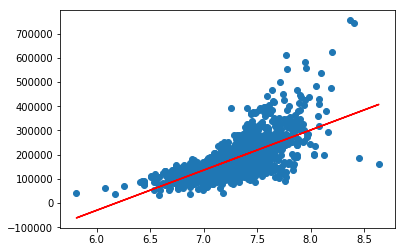

In [18]:
reg1 = LinearRegression()
reg1.fit(X1_train_sc, y_train)

print('coefficient = ', reg1.coef_[0]) # 説明変数の係数を出力
print('intercept = ', reg1.intercept_) # 切片を出力

plt.scatter(np.log(X1), y)
plt.plot(np.log(X1), reg1.predict(np.log(X1)), color="r")
plt.show()

MSE train data:  6528648461.484828
MSE test data :  6950542862.129185


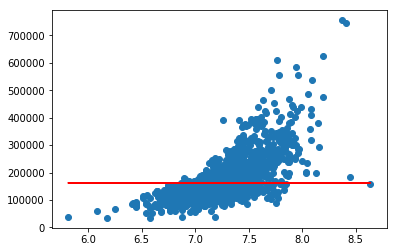

In [21]:
#SVR
svr1 = SVR()
svr1.fit(X1_train_sc, y_train)

y1_train_pred = svr1.predict(X1_train_sc) # 学習データに対する目的変数を予測
y1_pred = svr1.predict(X1_test_sc)   # 検証データに対する目的変数を予測

print('MSE train data: ', mean_squared_error(y_train, y1_train_pred)) # 学習データを用いたときの平均二乗誤差を出力
print('MSE test data : ', mean_squared_error(y_test, y1_pred))         # 検証データを用いたときの平均二乗誤差を出力

#作図
plt.scatter(np.log(X1), y)
plt.plot(np.log(X1), svr1.predict(np.log(X1)), color="r")
plt.show()

MSE train data:  26211606925.62831
MSE test data :  26818586066.232876


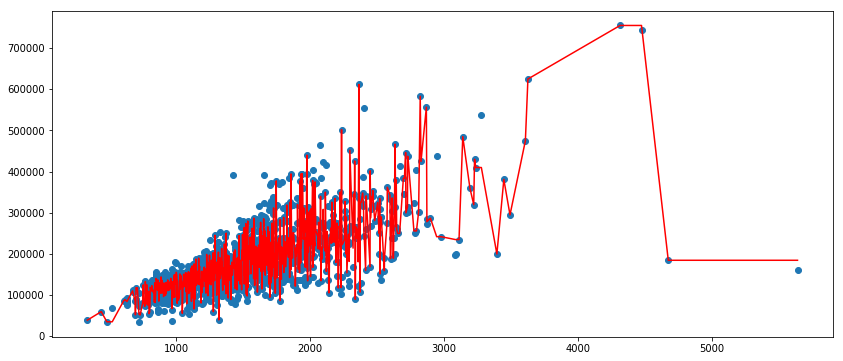

In [25]:
#DecisionTreeRegressor
dtr1 = DecisionTreeRegressor()
dtr1.fit(X1_train, y_train)

y1_train_pred = dtr1.predict(X1_train_sc) # 学習データに対する目的変数を予測
y1_pred = dtr1.predict(X1_test_sc)   # 検証データに対する目的変数を予測

print('MSE train data: ', mean_squared_error(y_train, y1_train_pred)) # 学習データを用いたときの平均二乗誤差を出力
print('MSE test data : ', mean_squared_error(y_test, y1_pred))         # 検証データを用いたときの平均二乗誤差を出力

#作図


plt.figure(figsize=(14,6))
sort_idx = X1.flatten().argsort()

plt.scatter(X1[sort_idx], y[sort_idx])
plt.plot(X1[sort_idx], dtr1.predict(X1[sort_idx]), color="r")
plt.show()


MSE train data:  24493571305.46393
MSE test data :  4150338868.7294536


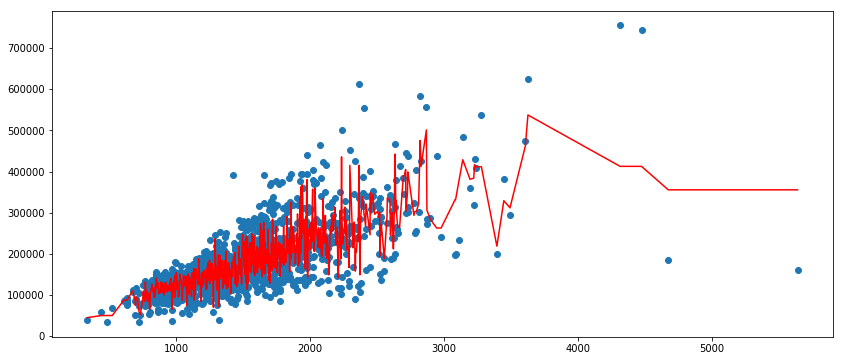

In [26]:
#RandomForestRegressor
rfr1 = RandomForestRegressor()
rfr1.fit(X1_train, y_train)

y1_train_pred = rfr1.predict(X1_train_sc) # 学習データに対する目的変数を予測
y1_pred = rfr1.predict(X1_test)   # 検証データに対する目的変数を予測

print('MSE train data: ', mean_squared_error(y_train, y1_train_pred)) # 学習データを用いたときの平均二乗誤差を出力
print('MSE test data : ', mean_squared_error(y_test, y1_pred))         # 検証データを用いたときの平均二乗誤差を出力

plt.figure(figsize=(14,6))
sort_idx = X1.flatten().argsort()

plt.scatter(X1[sort_idx], y[sort_idx])
plt.plot(X1[sort_idx], rfr1.predict(X1[sort_idx]), color="r")
plt.show()

【可視化の考察】

- 線形回帰学習データに対してモデルとしての直線を描いている
- 決定木とランダムフォレストは学習データに対して過度にフィッティングしており、グラフが複雑な形となっている

- 今回、特徴量は１種類で行なっているので可視化が可能となっているが、実務的には多数の変数を扱うので、図示は難しい。MSEの値を判断基準としてモデルを改良していく。

- 決定木やランダムフォレストに関しては、学習データを変えてモデルを複数作成し、それらの平均を取ることで精度を上げていくやり方がある。